<a href="https://colab.research.google.com/github/wp225/sklearn/blob/main/log_it_stic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
class logisticreg(object):
  
  def __init__(self,eta=.03,random_state=1,n_iter=5):
    self.eta=eta
    self.random_state=random_state
    self.n_iter=n_iter
    
  def fit(self,X,Y):
    rgen=np.random.RandomState(self.random_state)
    self.w_=rgen.normal(loc=0.0,scale=.01,size=1+X.shape[1])
    self.cost=[]
    for i in range(self.n_iter):
      net_ip=self.input(X)
      output=self.activation(net_ip)
      error=(Y-output)
      self.w_[1:]+=self.eta*X.T.dot(error)
      self.w_[1:]+=self.eta*error.sum()
      cost_= (-Y.dot(np.log(output)) -((1 - Y).dot(np.log(1 - output))))
      self.cost.append(cost_)
    return self
  
  def input(self,X):
    return np.dot(X,self.w_[1:]+self.w_[0])
  
  def activation(self,z):
    return 1/(1+np.exp(-np.clip(z,-250,250)))

  def predict(self,X):
    return np.where(self.net_input(X) >= 0.0, 1, 0)

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [4]:
iris=datasets.load_iris()

In [5]:
x_train,x_test,y_train,y_test=train_test_split(iris.data,iris.target,train_size=.7,stratify=iris.target)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train_std=scaler.transform(x_train)

In [7]:
x_train01=x_train[(y_train==0)|(y_train==1)]
y_train01=y_train[(y_train==0)|(y_train==1)]

In [8]:
reg=logisticreg(eta=.03,n_iter=100,random_state=1)

In [9]:
reg.fit(x_train01,y_train01)

<ipython-input-2-77258f589a98>:18: RuntimeWarning: divide by zero encountered in log
  cost_= (-Y.dot(np.log(output)) -((1 - Y).dot(np.log(1 - output))))


In [10]:
print(min(reg.cost))
print(max(reg.cost))

0.012553949055753551
1053.8422900465325


In [ ]:
plt.scatter(np.arange(0,100,1),reg.cost)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(iris.data,iris.target,train_size=.7,stratify=iris.target)

In [129]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train_std=scaler.transform(x_train)
x_test_std=scaler.transform(x_test)
x_combined=scaler.transform(iris.data)
y=iris.target

In [125]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=100,solver='lbfgs',random_state=1,multi_class='ovr')

In [133]:
x_train_std.shape
x=np.delete(x_combined,[2,3],axis=1)

In [131]:
lr.fit(x,y_train)

LogisticRegression(C=100, multi_class='ovr', random_state=1)

In [137]:
def plot_decision_regions(X, y, classifier, test_idx=None,
                             resolution=0.02):
       # setup marker generator and color map
       markers = ('s', 'x', 'o', '^', 'v')
       colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
       cmap = ListedColormap(colors[:len(np.unique(y))])
       # plot the decision surface
       x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
       x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
       xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                              np.arange(x2_min, x2_max, resolution))
       Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
       Z = Z.reshape(xx1.shape)
       plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
       plt.xlim(xx1.min(), xx1.max())
       plt.ylim(xx2.min(), xx2.max())
       for idx, cl in enumerate(np.unique(y)):
           plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                       alpha=0.8, c=colors[idx],
                       marker=markers[idx], label=cl,
                       edgecolor='red')
          
       

<ipython-input-137-8bb7abb6dcec>:18: UserWarning: You passed a edgecolor/edgecolors ('red') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


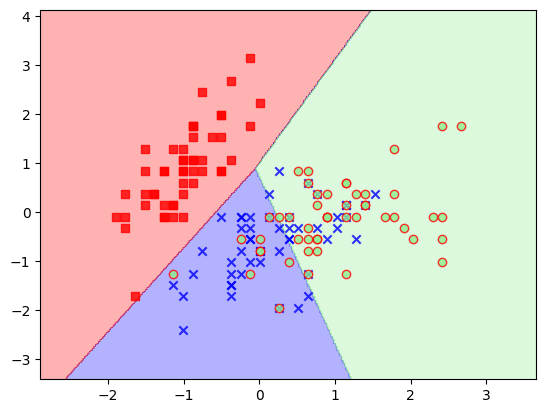

In [138]:
plot_decision_regions(x,y,classifier=lr,test_idx=range(105, 150))